<a href="https://colab.research.google.com/github/eeolga/deep/blob/main/Logs_new_data_processing_training.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [64]:
import numpy as np
import torch

In [65]:
import pandas as pd

In [66]:
import torch
from torch import nn

In [67]:
from sklearn.model_selection import train_test_split
import matplotlib as mpl
import seaborn as sns
sns.set(style="darkgrid")


In [68]:
file_path="/content/logs_CAD_2024_new.xlsx"

CAD_logs file data

In [69]:
data = pd.read_excel("/content/logs_CAD_2024_new.xlsx")

In [70]:
display(pd.DataFrame(data))

,user,log_lesson,logs_practice,logs,mother_tongue,gender,age,grade
0,26604,184,193,377,0,1,23,4
1,26610,77,65,142,1,1,21,0
2,26563,120,216,336,1,1,21,4
3,26544,259,214,473,1,1,21,5
4,26760,192,269,461,1,0,22,5
5,26789,31,156,187,1,1,22,4
6,26864,41,61,102,0,1,22,0
7,23558,0,93,93,1,0,22,0
8,26861,199,293,492,0,1,21,3
9,29684,134,114,248,1,1,22,4


In [71]:
%matplotlib inline
mpl.rc('axes', labelsize=14)
mpl.rc('xtick', labelsize=12)
mpl.rc('ytick', labelsize=12)

In [72]:
pd.options.display.float_format = '{:.3f}'.format

Feature Engineering

In [73]:
df = pd.read_excel("/content/logs_CAD_2024_new.xlsx")
test_df = pd.read_excel("/content/logs_CAD_2024_new.xlsx")

df.info()
def feature_engineering(df): #feature engineering function

    return df

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 17 entries, 0 to 16
Data columns (total 8 columns):
 #   Column         Non-Null Count  Dtype
---  ------         --------------  -----
 0   user           17 non-null     int64
 1   log_lesson     17 non-null     int64
 2   logs_practice  17 non-null     int64
 3   logs           17 non-null     int64
 4   mother_tongue  17 non-null     int64
 5   gender         17 non-null     int64
 6   age            17 non-null     int64
 7   grade          17 non-null     int64
dtypes: int64(8)
memory usage: 1.2 KB


In [74]:
df.sample(n=5)

,user,log_lesson,logs_practice,logs,mother_tongue,gender,age,grade
0,26604,184,193,377,0,1,23,4
4,26760,192,269,461,1,0,22,5
10,29133,207,193,400,1,1,20,5
12,29346,240,238,478,1,1,20,5
15,29598,4,116,120,1,1,25,0


In [75]:
def feature_engineering(df): #feature engineering function

    return df

In [76]:
df = feature_engineering(df)

In [77]:
df.isna().sum()  #Data Cleaning

user             0
log_lesson       0
logs_practice    0
logs             0
mother_tongue    0
gender           0
age              0
grade            0
dtype: int64

In [78]:
#Min-max scaling, Normalization
def scale_min_max(df, col_name, xmin, xmax):
    df[col_name] = (df[col_name] - xmin) / (xmax - xmin)
    return df

train_age_min = df['logs'].min()
train_age_max = df['logs'].max()
df = scale_min_max(df, 'logs', train_age_min, train_age_max)

df['logs'].describe()

count   17.000
mean     0.574
std      0.364
min      0.000
25%      0.219
50%      0.714
75%      0.884
max      1.000
Name: logs, dtype: float64

In [79]:
def add_dummies(df, cols):  #Dummy variables addition:
    df = pd.get_dummies(df, columns=cols)
    return df

cols = ['user']
df = add_dummies(df, cols)

print(df.columns, '\n', len(df.columns))

Index(['log_lesson', 'logs_practice', 'logs', 'mother_tongue', 'gender ',
       'age', 'grade', 'user_23558', 'user_26544', 'user_26563', 'user_26604',
       'user_26610', 'user_26760', 'user_26789', 'user_26861', 'user_26864',
       'user_29133', 'user_29292', 'user_29346', 'user_29349', 'user_29350',
       'user_29598', 'user_29684', 'user_29723'],
      dtype='object') 
 24


Data procecced

In [80]:
test_proc = (test_df.pipe(feature_engineering) #Apply the same data processing steps to the test set
                    .drop(['grade'], axis=1)
                    .pipe(scale_min_max, 'logs', train_age_min, train_age_max)
                    .pipe(add_dummies, cols)
)

test_proc.sample(6)

,log_lesson,logs_practice,logs,mother_tongue,gender,age,user_23558,user_26544,user_26563,user_26604,...,user_26861,user_26864,user_29133,user_29292,user_29346,user_29349,user_29350,user_29598,user_29684,user_29723
3,259,214,0.884,1,1,21,False,True,False,False,...,False,False,False,False,False,False,False,False,False,False
12,240,238,0.895,1,1,20,False,False,False,False,...,False,False,False,False,True,False,False,False,False,False
11,323,109,0.788,1,0,20,False,False,False,False,...,False,False,False,True,False,False,False,False,False,False
4,192,269,0.856,1,0,22,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
15,4,116,0.063,1,1,25,False,False,False,False,...,False,False,False,False,False,False,False,True,False,False
2,120,216,0.565,1,1,21,False,False,True,False,...,False,False,False,False,False,False,False,False,False,False


In [81]:
def divide_df(all_data):
    # Returns divided dfs of training and test set
    return all_data.loc[:16], all_data.loc[16:].drop(['timestamp'], axis=1)

df_train = pd.read_excel("/content/logs_CAD_2024_new.xlsx")
df_test = pd.read_excel("/content/logs_CAD_2024_new.xlsx")


df_train.name = 'Training Set'
df_test.name = 'Test Set'


dfs = [df_train, df_test]

print('Number of Training Examples = {}'.format(df_train.shape[0]))
print('Number of Test Examples = {}\n'.format(df_test.shape[0]))
print('Training X Shape = {}'.format(df_train.shape))
print('Training y Shape = {}\n'.format(df_train['user'].shape[0]))
print('Test X Shape = {}'.format(df_test.shape))
print('Test y Shape = {}\n'.format(df_test.shape[0]))
print(df_train.columns)
print(df_test.columns)

Number of Training Examples = 17
Number of Test Examples = 17

Training X Shape = (17, 8)
Training y Shape = 17

Test X Shape = (17, 8)
Test y Shape = 17

Index(['user', 'log_lesson', 'logs_practice', 'logs', 'mother_tongue',
       'gender ', 'age', 'grade'],
      dtype='object')
Index(['user', 'log_lesson', 'logs_practice', 'logs', 'mother_tongue',
       'gender ', 'age', 'grade'],
      dtype='object')


In [82]:
print(df_train.info())
df_train.sample(3)

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 17 entries, 0 to 16
Data columns (total 8 columns):
 #   Column         Non-Null Count  Dtype
---  ------         --------------  -----
 0   user           17 non-null     int64
 1   log_lesson     17 non-null     int64
 2   logs_practice  17 non-null     int64
 3   logs           17 non-null     int64
 4   mother_tongue  17 non-null     int64
 5   gender         17 non-null     int64
 6   age            17 non-null     int64
 7   grade          17 non-null     int64
dtypes: int64(8)
memory usage: 1.2 KB
None


,user,log_lesson,logs_practice,logs,mother_tongue,gender,age,grade
7,23558,0,93,93,1,0,22,0
10,29133,207,193,400,1,1,20,5
0,26604,184,193,377,0,1,23,4


In [83]:
# Ensure 'grade' column is dropped from both training and test datasets
df_train_cleaned = df_train.drop(['grade'], axis=1)
df_test_cleaned = df_test.drop(['grade'], axis=1)

# Verify all columns in df_train_cleaned and df_test_cleaned are numeric
numeric_columns_train = df_train_cleaned.select_dtypes(include=[int, float]).columns
numeric_columns_test = df_test_cleaned.select_dtypes(include=[int, float]).columns

In [84]:
# Compute correlations only on numeric columns
df_train_corr = df_train_cleaned[numeric_columns_train].corr().abs().unstack().sort_values(kind="quicksort", ascending=False).reset_index()
df_train_corr.rename(columns={"level_0": "Feature 1", "level_1": "Feature 2", 0: 'Correlation Coefficient'}, inplace=True)
df_train_corr.drop(df_train_corr.iloc[1::2].index, inplace=True)
df_train_corr_nd = df_train_corr.drop(df_train_corr[df_train_corr['Correlation Coefficient'] == 1.0].index)

In [85]:
df_test_corr = df_test_cleaned[numeric_columns_test].corr().abs().unstack().sort_values(kind="quicksort", ascending=False).reset_index()
df_test_corr.rename(columns={"level_0": "Feature 1", "level_1": "Feature 2", 0: 'Correlation Coefficient'}, inplace=True)
df_test_corr.drop(df_test_corr.iloc[1::2].index, inplace=True)
df_test_corr_nd = df_test_corr.drop(df_test_corr[df_test_corr['Correlation Coefficient'] == 1.0].index)

In [86]:
corr = df_train_corr_nd['Correlation Coefficient'] > 0.1 # Training set correlations
df_train_corr_nd[corr]

,Feature 1,Feature 2,Correlation Coefficient
8,log_lesson,logs,0.915
10,logs,logs_practice,0.863
12,logs_practice,log_lesson,0.586
14,log_lesson,age,0.522
16,user,log_lesson,0.449
18,mother_tongue,age,0.447
20,logs,age,0.403
22,user,logs,0.398
24,gender,user,0.343
26,gender,mother_tongue,0.257


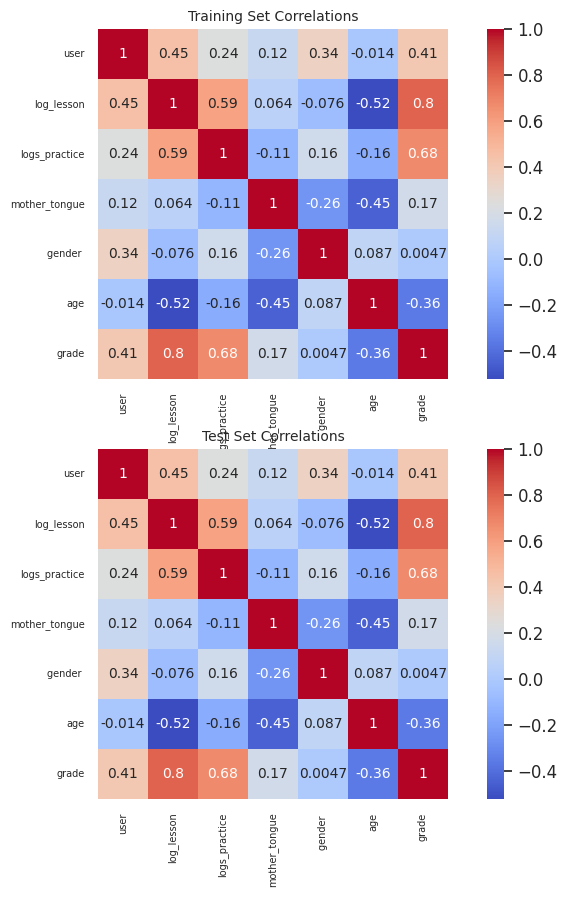

In [87]:
import matplotlib.pyplot as plt

fig, axs = plt.subplots(nrows=2, figsize=(10, 10))

sns.heatmap(df_train.drop(['logs'], axis=1).corr(), ax=axs[0], annot=True, square=True, cmap='coolwarm', annot_kws={'size': 10})
sns.heatmap(df_test.drop(['logs'], axis=1).corr(), ax=axs[1], annot=True, square=True, cmap='coolwarm', annot_kws={'size': 10})

for i in range(2):
    axs[i].tick_params(axis='x', labelsize=7)
    axs[i].tick_params(axis='y', labelsize=7)

axs[0].set_title('Training Set Correlations', size=10)
axs[1].set_title('Test Set Correlations', size=10)

plt.show()

Model training

In [88]:
import pandas as pd
import torch
import torch.nn as nn
import torch.optim as optim
import torch.nn.functional as F
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import classification_report
import matplotlib.pyplot as plt

# Step 1: Load Data from Excel
file_path = '/content/logs_CAD_2024_new.xlsx'
data = pd.read_excel(file_path)

# Assuming your Excel file has columns 'features' and 'target'
X = data.drop('grade', axis=1).values
y = data['grade'].values

# Ensure target values are 0 or 1
y = (y == 1).astype(float)

# Step 2: Preprocess Data
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)
scaler = StandardScaler()
X_train = scaler.fit_transform(X_train)
X_test = scaler.transform(X_test)
X_train = torch.tensor(X_train, dtype=torch.float32)
y_train = torch.tensor(y_train, dtype=torch.float32).unsqueeze(1)
X_test = torch.tensor(X_test, dtype=torch.float32)
y_test = torch.tensor(y_test, dtype=torch.float32).unsqueeze(1)

# Use only one model definition, and adjust the input size to match your data
class SimpleNN(nn.Module): # define the Model
    def __init__(self, input_dim):
        super(SimpleNN, self).__init__()
        self.layer1 = nn.Linear(input_dim, 64)
        self.layer2 = nn.Linear(64, 32)
        self.layer3 = nn.Linear(32, 16)
        self.layer4 = nn.Linear(16, 1)

    def forward(self, x):
        x = torch.relu(self.layer1(x))
        x = torch.relu(self.layer2(x))
        x = torch.relu(self.layer3(x))
        x = torch.sigmoid(self.layer4(x))
        return x

# Instantiate the model with the correct input dimension
input_dim = X_train.shape[1]  # Get the input dimension from your preprocessed data
model = SimpleNN(input_dim)

# Define loss function and optimizer
criterion = nn.BCELoss()  # Binary Cross Entropy Loss
optimizer = optim.Adam(model.parameters(), lr=0.001)

# Training loop
num_epochs = 100
training_losses = []
validation_losses = []

for epoch in range(num_epochs):
    model.train()

    outputs = model(X_train)   # Forward pass
    loss = criterion(outputs, y_train)

    optimizer.zero_grad()  # backward pass and optimization
    loss.backward()
    optimizer.step()

    training_losses.append(loss.item())

    model.eval()
    with torch.no_grad():
        val_outputs = model(X_test)
        val_loss = criterion(val_outputs, y_test)
        validation_losses.append(val_loss.item())

    if (epoch + 1) % 10 == 0:
        print(f'Epoch [{epoch + 1}/{num_epochs}], Loss: {loss.item():.4f}, Val Loss: {val_loss.item():.4f}')

Epoch [10/100], Loss: 0.6046, Val Loss: 0.5968
Epoch [20/100], Loss: 0.5465, Val Loss: 0.5338
Epoch [30/100], Loss: 0.4821, Val Loss: 0.4609
Epoch [40/100], Loss: 0.3903, Val Loss: 0.3573
Epoch [50/100], Loss: 0.2770, Val Loss: 0.2348
Epoch [60/100], Loss: 0.1664, Val Loss: 0.1282
Epoch [70/100], Loss: 0.0865, Val Loss: 0.0621
Epoch [80/100], Loss: 0.0429, Val Loss: 0.0304
Epoch [90/100], Loss: 0.0227, Val Loss: 0.0166
Epoch [100/100], Loss: 0.0135, Val Loss: 0.0104


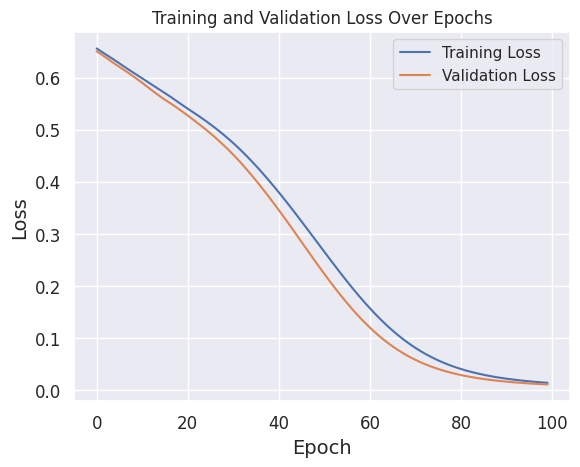

In [89]:
plt.plot(training_losses, label='Training Loss') # plot the losses
plt.plot(validation_losses, label='Validation Loss')
plt.xlabel('Epoch')
plt.ylabel('Loss')
plt.title('Training and Validation Loss Over Epochs')
plt.legend()
plt.show()

Model training summary:

Consistent Improvement


Excellent Performance


No Overfitting Indications


Optimal Training


These results indicate a successful training process where the model has learned to generalize well from the training data to the validation data, resulting in very low losses by the end of training.

In [100]:

model.eval()
with torch.no_grad():
    raw_outputs = model(X_test)
    print(f'Raw outputs (first 10): {raw_outputs[:10].flatten()}')

    # Adjust threshold if necessary
    threshold = 0.01
    y_predicted = (raw_outputs > threshold).float()
    unique_values = y_predicted.unique()
    print(f'Unique values in predictions with threshold {threshold}: {unique_values}')

    y_test_flat = y_test.flatten()
    if len(unique_values) == 1:
        print(f'Only one class ({unique_values.item()}) predicted with threshold {threshold}.')
    else:
        print(classification_report(y_test_flat, y_predicted, target_names=['class 0', 'class 1']))

Raw outputs (first 10): tensor([0.0243, 0.0058, 0.0085, 0.0026])
Unique values in predictions with threshold 0.01: tensor([0., 1.])
              precision    recall  f1-score   support

     class 0       1.00      0.75      0.86         4
     class 1       0.00      0.00      0.00         0

    accuracy                           0.75         4
   macro avg       0.50      0.38      0.43         4
weighted avg       1.00      0.75      0.86         4



/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Recall and F-score are ill-defined and being set to 0.0 in labels with no true samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Recall and F-score are ill-defined and being set to 0.0 in labels with no true samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Recall and F-score are ill-defined and being set to 0.0 in labels with no true samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


In [101]:
from sklearn.metrics import classification_report

# Use y_test_flat as the true labels
print(classification_report(y_test_flat, y_predicted, zero_division=1))  # or zero_division=0

              precision    recall  f1-score   support

         0.0       1.00      0.75      0.86         4
         1.0       0.00      1.00      0.00         0

    accuracy                           0.75         4
   macro avg       0.50      0.88      0.43         4
weighted avg       1.00      0.75      0.86         4



In [102]:
import numpy as np

unique, counts = np.unique(y_test_flat, return_counts=True) # Use y_test_flat which contains the true labels
print(dict(zip(unique, counts)))

{0.0: 4}


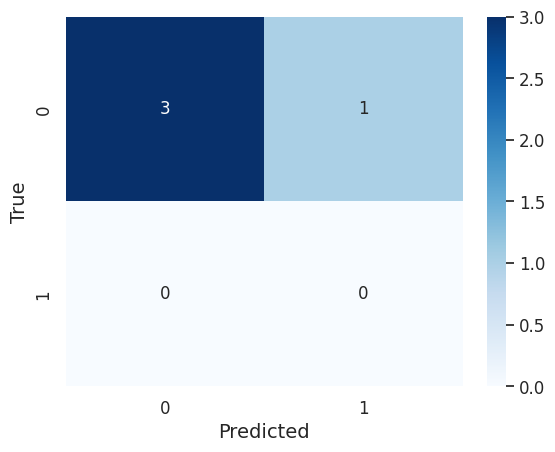

In [103]:
from sklearn.metrics import confusion_matrix
import seaborn as sns
import matplotlib.pyplot as plt

# Assuming 'y_test_flat' contains your true labels, replace 'y_true' with it
cm = confusion_matrix(y_test_flat, y_predicted)

sns.heatmap(cm, annot=True, fmt='d', cmap='Blues')
plt.xlabel('Predicted')
plt.ylabel('True')
plt.show()

The model shows a high accuracy of 75%, but this is based on a very small and imbalanced dataset. The precision for class 0.0 is perfect, but recall is moderate, indicating that the model missed some instances of class 0.0. The metrics for class 1.0 are not meaningful due to the lack of instances. Addressing the class imbalance and ensuring a larger, more balanced dataset for training and evaluation are crucial steps to improve the model's performance.